# Final Project - Nicholas Vaughan
## _Double Pendulum_

### 1.0 Introduction

### Equations of motion
First, we set up our system: Our double pendulum is that of two point masses dangling from the origin m1 dangles on a massless rod of length $l_1$, while the second mass dangles from the first on a rod of length $l_2$. The Lagrangian for such a system is:

$L = T - V = (\frac{m_1}{2} + \frac{m_2}{2})l_1^2\dot{\theta_1}^2 + \frac{m_2}{2}l_2^2\dot{\theta_2}^2 + m_2l_1l_2\dot{\theta_1}\dot{\theta_2}\cos(\theta_1-\theta_2) + (m_1 + m_2)gl_1\cos{\theta_1} + m_2gl_2\cos{\theta_2}$

This Lagrangian yields the system of equations:

$(m_1 + m_2)l_1\ddot{\theta_1} + m_2l_2\ddot{\theta_2}\cos(\theta_1 - \theta_2) + m_2l_2\dot{\theta_2}^2(m_1 + m_2)g\sin{\theta_1} = 0$

And

$l_2\ddot{\theta_2} + l_1\ddot{\theta_1}\cos{(\theta_1 - \theta_2)} - l_1\dot{\theta_1}^2\sin{(\theta_1 - \theta_2)} + g\sin{\theta_2} = 0$

If we define $\omega_{1,2} \equiv \dot{\theta}_{1,2}$, we can we can rearrange these equations to get:

$\dot{\omega}_1 = \frac{m_2g\sin\theta_2\cos(\theta_1-\theta_2) - m_2\sin(\theta_1-\theta_2)[l_1\omega_1^2\cos(\theta_1-\theta_2) + l_2\omega_2^2] - (m_1 + m_2)g\sin{\theta_1}} {l_1[m_1 + m_2\sin^2(\theta_1-\theta_2)]}$

and

$\dot{\omega}_2 = \frac{(m_1 + m_2)[l_1\omega_1^2\sin(\theta_1-\theta_2) - g\sin{\theta_2} + g\sin{\theta_1}\cos(\theta_1-\theta_2)] + m_2l_2\omega_2^2\sin(\theta_1-\theta_2)\cos(\theta_1-\theta_2)} {l_2[m_1 + m_2\sin^2(\theta_1-\theta_2)]}$

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.patches import Circle

In [2]:
#useful constant
g = 9.81

In [10]:
def getDot(var, t, l1, l2, m1, m2):
    
    """
    Returns: First derivatives of omega_1,2 and theta_1,2
    -----------------------------------------------------
    Inputs:
    var - array like object conataining theta1, theta2, omega1, and omega2.
    t - time array
    l1,l2 - respective lengths of the pendulums to the masses
    m1,m2 - masses of each pendulum
    
    """
    
    #Pull in values from var
    th1 = var[0]
    th2 = var[2]
    om1 = var[1]
    om2 = var[3]
    
    #First derivatives of thetas are just the omegas
    thdot1 = om1
    thdot2 = om2
    
    #Since these terms show up a lot, it's cleaner to assign them to shorter variables
    A = np.cos(th1-th2)
    B = np.sin(th1-th2)
    
    #Calculate first derivative of omegas
    omdot1 = ((m2*g*np.sin(th2)*A - m2*B*(l1*om1**2*A + l2*om2**2) - (m1+m2)*g*np.sin(th1))/
              (l1*(m1+m2*B**2)))
    omdot2 = (((m1+m2)*(l1*om1**2*B - g*np.sin(th2) + g*np.sin(th1)*A) + m2*l2*A*B*om2**2)/
              (l2*(m1+m2*B**2)))
    
    return thdot1, omdot1, thdot2, omdot2
    

In [4]:
def getEnergy(var):
    """
    Returns: 
    The total amount of energy of the system. This is to help keep numerical drift 
    within a given tolerence.
    ------------------------------------------------------------------------------
    Inputs:
    var - array like object conataining theta1, theta2, omega1, and omega2.
    
    """
    th1, th1d, th2, th2d = y.T
    V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
    
    T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 +
            2*L1*L2*th1d*th2d*np.cos(th1-th2))
    return T + V

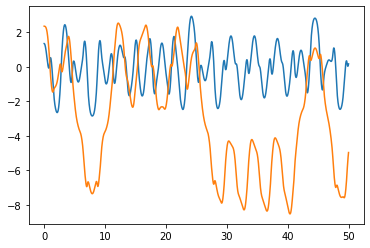

In [25]:
tfinal = 50
dt = .0001

t = np.arange(0, tfinal+dt, dt)
l1 = 1
l2 = 2
m1 = 1
m2 = 1
init = np.array([3*np.pi/7, 0, 3*np.pi/4, 0])

ret = odeint(getDot, init, t, args=(l1,l2,m1,m2))

th1 = ret[:,0]
th2 = ret[:,2]
om1 = ret[:,1]
om2 = ret[:,3]

plt.plot(t,th1)
plt.plot(t,th2)

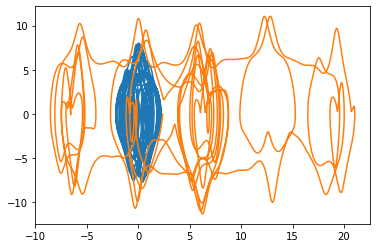

In [23]:
plt.plot(th1,om1)
plt.plot(th2,om2)